In [18]:
#necessary package import
#Numpy
import numpy as np
from numpy.linalg import multi_dot
from math import factorial, tanh
#Matplotlib
import matplotlib.pyplot as plt
#Scipy
from scipy.linalg import block_diag
#Thewalrus
from thewalrus import perm
#Strawberryfields
import strawberryfields as sf
from strawberryfields.ops import *
import mplhep as hep

In [25]:
#set the random seed
np.random.seed(42)

#initialize a 6 mode program
boson_sampling = sf.Program(5)

with boson_sampling.context as q:
    #Prepare the input fock states
    Vac      |  q[0]
    Fock(1)  |  q[1]
    Fock(1)  |  q[2]
    Fock(1)  |  q[3] 
    Vac      |  q[4]

    #BS1
    BSgate(0.2804, 0.8578)  | (q[0], q[1])
    #BS2
    BSgate(0.06406, 0.5165) | (q[2], q[3])

    #P1
    Rgate(-1.0082) | q[0]
    #P2
    Rgate(1.2782)  | q[1]
    #P3
    Rgate(-0.9782) | q[2]
    #P4
    Rgate(2.1782)  | q[3]
    
    #BS3
    BSgate(0.473, 0.1176)   | (q[1], q[2])
    #BS4
    BSgate(0.573, 0.2176)   | (q[3], q[4])

    #P5
    Rgate(1.7782)  | q[1]
    #P6
    Rgate(-2.0782) | q[2]
    #P7
    Rgate(1.1112)  | q[3]
    #P8
    Rgate(0.1582)  | q[4]

    #BS5
    BSgate(0.5663, 0.1517)   | (q[0], q[1])
    #BS6
    BSgate(0.1323, 0.9946)   | (q[2], q[3])

    #P9
    Rgate(-1.4782) | q[1]
    #P10
    Rgate(0.7782)  | q[2]
    #P11
    Rgate(3.1782)  | q[3]

    #BS7
    BSgate(0.311, 0.3231)   | (q[1], q[2])
    #BS8
    BSgate(0.573, 0.1476)   | (q[3], q[4])


In [26]:
eng = sf.Engine(backend = "fock", backend_options = {"cutoff_dim" : 4})
results = eng.run(boson_sampling)

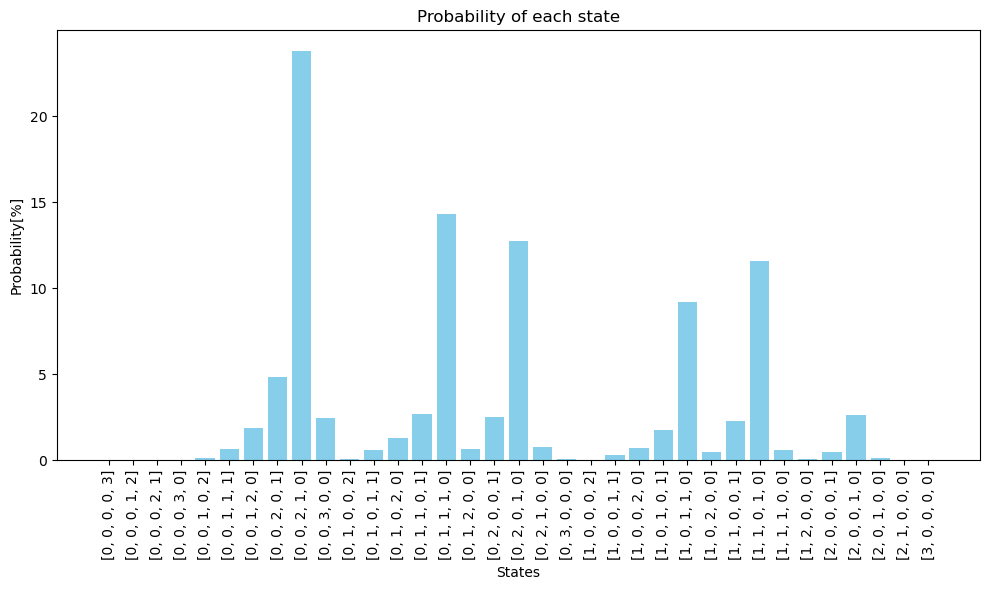

In [34]:
# Calculating the probability for each state in measure_states
measure_states = [[x, y, z, t, w] for x in range(4) for y in range(4) for z in range(4) for t in range(4) for w in range(4) if x + y + z + t + w == 3]
state_probs = [probs[tuple(state)]*100 for state in measure_states]

# Creating labels for the states
state_labels = [str(state) for state in measure_states]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(state_labels, state_probs, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Probability[%]")
#plt.yscale('log')
plt.title("Probability of each state")
plt.tight_layout()

#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
#plt.savefig('/Users/jaewonlee/Lab/PQC/BS_Q_4(log).png', transparent = True)

# Showing the plot
plt.show()

In [35]:
BSargs = [
    (0.2804, 0.8578),
    (0.06406, 0.5165),
    (0.473, 0.1176),
    (0.573, 0.2176),
    (0.5663, 0.1517),
    (0.1323, 0.9946),
    (0.311, 0.3231),
    (0.573, 0.1476)
]

t_r_amplitudes = [(np.cos(q), np.exp(p*1j)*np.sin(q)) for q,p in BSargs]

BSunitaries = [np.array([[t, -np.conj(r)], [r, t]]) for t,r in t_r_amplitudes]
#print(BSunitaries[0:2])
#print(BSunitaries[2])

UBS1 = block_diag(BSunitaries[0], BSunitaries[1], [[1]])
UBS2 = block_diag([[1]], BSunitaries[2], BSunitaries[3])
UBS3 = block_diag(BSunitaries[4], BSunitaries[5], [[1]])
UBS4 = block_diag([[1]], BSunitaries[6], BSunitaries[7])

In [36]:
UP1 = np.diag([np.exp(-1.0082*1j),np.exp(1.2782*1j),np.exp(-0.9782*1j),np.exp(2.1782*1j),1])
UP2 = np.diag([1,np.exp(1.7782*1j),np.exp(-2.0782*1j),np.exp(1.1112*1j),np.exp(0.1582*1j)])
UP3 = np.diag([1,np.exp(-1.4782*1j),np.exp(0.7782*1j),np.exp(3.1782*1j),1])

In [37]:
U = multi_dot([UBS4, UP3, UBS3, UP2, UBS2, UP1, UBS1])
print(U)

[[ 0.54004214-6.09052097e-01j  0.51408094+1.15727639e-01j
   0.21036274+1.23452994e-01j -0.01564484-2.22171683e-04j
   0.        +0.00000000e+00j]
 [-0.52108236-2.48641275e-01j  0.00670555+7.09979230e-01j
  -0.02663123+3.99288442e-01j -0.04257867-1.01403268e-02j
  -0.02052752-7.58865074e-03j]
 [-0.05747871-2.19167016e-02j  0.38330312+2.60684377e-01j
  -0.64326531-5.80827609e-01j  0.15977673+4.77308304e-03j
   0.05306244+4.26643648e-02j]
 [-0.00497755-1.30578225e-02j -0.04560212-1.65844647e-02j
   0.09583187+1.13292971e-01j  0.89896761-7.22333460e-02j
  -0.1856408 +3.57222841e-01j]
 [-0.00193762-8.80572848e-03j -0.02752933-1.49111724e-02j
   0.00920971+8.43300424e-02j  0.04467783+3.96145826e-01j
   0.83514168+3.67903358e-01j]]


In [38]:
input = [0, 1, 1, 1, 0]

def probs_theory(output):
    global U, input
    # The two lines below are the extracted row and column indices.
    list_rows = sum([[i] * output[i] for i in range(len(output))],[])
    list_columns = sum([[i] * input[i] for i in range(len(input))],[])
    U_st = U[:,list_columns][list_rows,:]
    perm_squared = np.abs(perm(U_st, method="ryser"))**2
    denominator = np.prod([factorial(inp) for inp in input]) * np.prod([factorial(out) for out in output])
    return perm_squared / denominator


In [39]:
#Comparing Theory and Simulation
# Initialize the total probability
total_probability_T = 0  
total_probability_S = 0

# measure_states의 각 상태에 대해 확률을 출력
for i, state in enumerate(measure_states):
    # 각 상태의 확률을 출력
    # *state는 state 리스트의 요소들을 개별 인자로 전달합니다.
    print(f"Probability of state(Theory)     {state}: {probs_theory(state)*100}%")
    print(f"Probability of state(Simulation) {state}: {probs[tuple(state)]*100}%")
    total_probability_T += probs_theory(state)
    total_probability_S += probs[tuple(state)]
    
# Print the total probability
print(f"Total probability(Theory):     {total_probability_T*100}%")
print(f"Total probability(Simulation): {total_probability_S*100}%")

Probability of state(Theory)     [0, 0, 0, 0, 3]: 0.0006726393606802994%
Probability of state(Simulation) [0, 0, 0, 0, 3]: 0.0006726393606802987%
Probability of state(Theory)     [0, 0, 0, 1, 2]: 0.004789005708997456%
Probability of state(Simulation) [0, 0, 0, 1, 2]: 0.004789005708997457%
Probability of state(Theory)     [0, 0, 0, 2, 1]: 0.016884847140862184%
Probability of state(Simulation) [0, 0, 0, 2, 1]: 0.0168848471408622%
Probability of state(Theory)     [0, 0, 0, 3, 0]: 0.025301684507784566%
Probability of state(Simulation) [0, 0, 0, 3, 0]: 0.025301684507784583%
Probability of state(Theory)     [0, 0, 1, 0, 2]: 0.1169338589651974%
Probability of state(Simulation) [0, 0, 1, 0, 2]: 0.11693385896519762%
Probability of state(Theory)     [0, 0, 1, 1, 1]: 0.6742670607906174%
Probability of state(Simulation) [0, 0, 1, 1, 1]: 0.6742670607906179%
Probability of state(Theory)     [0, 0, 1, 2, 0]: 1.8854802601787517%
Probability of state(Simulation) [0, 0, 1, 2, 0]: 1.8854802601787513%
Pro

In [40]:
for i, state in enumerate(measure_states):
    T = probs_theory(state)
    S = probs[tuple(state)]
    print(f"Error of state {state}: {100*np.abs(T-S)/T}%")

Error of state [0, 0, 0, 0, 3]: 1.0074140727032345e-13%
Error of state [0, 0, 0, 1, 2]: 1.4149625182745845e-14%
Error of state [0, 0, 0, 2, 1]: 6.421154798977601e-14%
Error of state [0, 0, 0, 3, 0]: 6.42764816005785e-14%
Error of state [0, 0, 1, 0, 2]: 1.854385345835874e-13%
Error of state [0, 0, 1, 1, 1]: 7.718262882111175e-14%
Error of state [0, 0, 1, 2, 0]: 1.8400865950326607e-14%
Error of state [0, 0, 2, 0, 1]: 1.005598112463674e-13%
Error of state [0, 0, 2, 1, 0]: 6.995551363301032e-14%
Error of state [0, 0, 3, 0, 0]: 5.608363041736107e-14%
Error of state [0, 1, 0, 0, 2]: 9.710878975738705e-14%
Error of state [0, 1, 0, 1, 1]: 1.8103540992719322e-13%
Error of state [0, 1, 0, 2, 0]: 9.55089006368798e-14%
Error of state [0, 1, 1, 0, 1]: 1.0366565924661026e-13%
Error of state [0, 1, 1, 1, 0]: 1.1626700440168793e-13%
Error of state [0, 1, 2, 0, 0]: 1.3013114840267597e-13%
Error of state [0, 2, 0, 0, 1]: 1.233969294455084e-13%
Error of state [0, 2, 0, 1, 0]: 1.0871750208492977e-13%
Erro

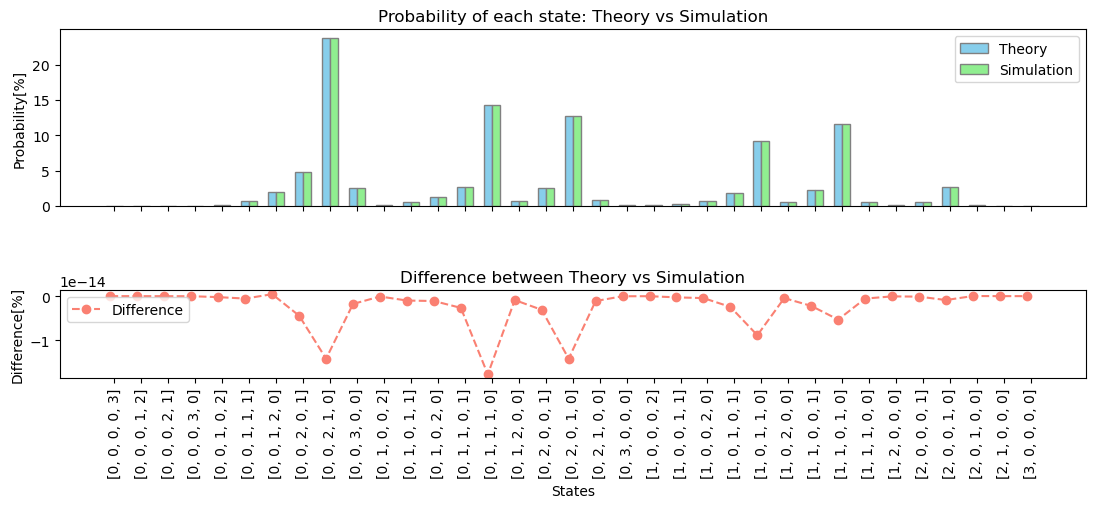

In [41]:
state_probs_theory = [probs_theory(state)*100 for state in measure_states]
state_probs_simulation = [probs[tuple(state)]*100 for state in measure_states]

# Creating labels for the states
state_labels = [str(state) for state in measure_states]

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(12,6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Define r1, r2, and barWidth
barWidth = 0.3
r1 = np.arange(len(state_probs_theory))
r2 = [x + barWidth for x in r1]

# Creating the bar plot in subplot 1
axs[0].bar(r1, state_probs_theory, color='skyblue', width=barWidth, edgecolor='grey', label='Theory')
axs[0].bar(r2, state_probs_simulation, color='lightgreen', width=barWidth, edgecolor='grey', label='Simulation')

# Adding labels and title to subplot 1
axs[0].set_ylabel("Probability[%]")
axs[0].set_title("Probability of each state: Theory vs Simulation")
axs[0].legend()

# Calculating the difference between theory and simulation
difference = [theory - sim for theory, sim in zip(state_probs_theory, state_probs_simulation)]

# Creating the line plot for difference in subplot 2
axs[1].plot(r1, difference, color='salmon', marker='o', label='Difference', linestyle='dashed')

# Adding labels and title to subplot 2
axs[1].set_xlabel("States")
axs[1].set_ylabel("Difference[%]")
axs[1].set_title("Difference between Theory vs Simulation")
axs[1].legend()

# Adding x-axis labels for both subplots
plt.xticks([r + barWidth/2 for r in range(len(state_probs_simulation))], state_labels, rotation=90)

# Adjusting layout to prevent overlap
plt.tight_layout(pad=4.0)

#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
#plt.savefig('/Users/jaewonlee/Lab/PQC/BS_Q_4(TandS).png', transparent = True)

# Showing the plot
plt.show()

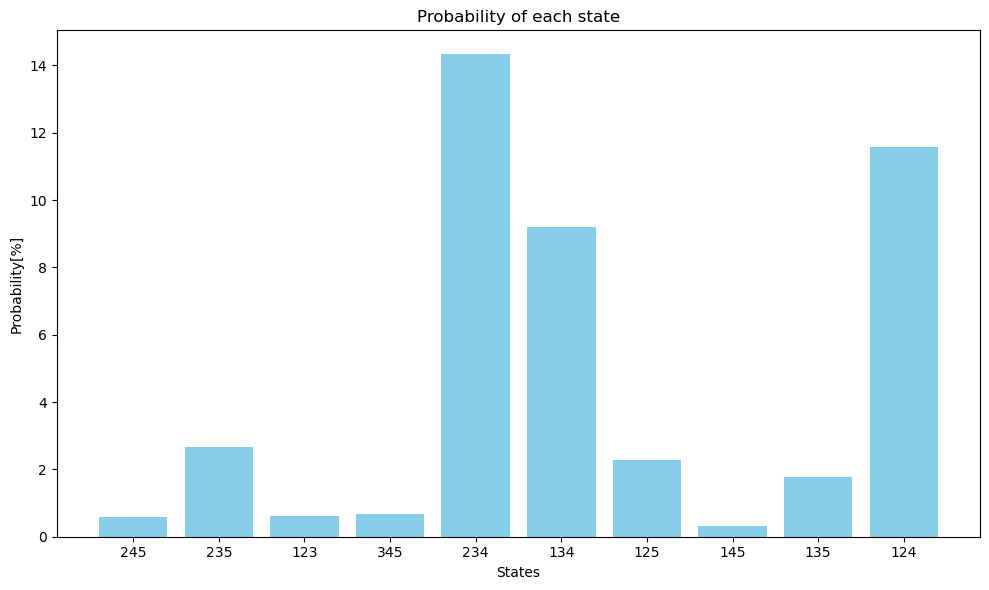

In [42]:
# Calculating the probability for each state in measure_states
measure_states = [[0, 1, 0, 1, 1], [0, 1, 1, 0, 1], [1, 1, 1, 0, 0], [0, 0, 1, 1, 1], [0, 1, 1, 1, 0], [1, 0, 1, 1, 0], [1, 1, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 1, 0, 1], [1, 1, 0, 1, 0]]
state_probs = [probs[tuple(state)]*100 for state in measure_states]

# Creating labels for the states
state_labels = ['245', '235', '123', '345', '234', '134', '125', '145', '135', '124']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(state_labels, state_probs, color='skyblue')

plt.xlabel("States")
plt.ylabel("Probability[%]")
#plt.yscale('log')
plt.title("Probability of each state")
plt.tight_layout()

#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
#plt.savefig('/Users/jaewonlee/Lab/PQC/BS_Q_5.png', transparent = True)

# Showing the plot
plt.show()
